Show, analyze and visualize the LSO results.

In [55]:
import numpy as np

data_file = '/pfs/work9/workspace/scratch/ma_mgraevin-optdif/results/debug_05/bo/iter_0/data.npz'

with np.load(data_file, allow_pickle=True) as npz:
    print(npz.files)
    X_train = npz['X_train'].astype(np.float32)
    y_train = npz['y_train'].astype(np.float32)

['X_train', 'X_test', 'y_train', 'y_test']


In [1]:
# Display tensor (3, 265, 256) as image
import matplotlib.pyplot as plt
import numpy as np

def show_tensor(tensor):
    # Convert to numpy array
    tensor = (tensor + 1) / 2
    img = tensor.permute(1, 2, 0).numpy()
    # Clip values to [0, 1]
    img = np.clip(img, 0, 1)
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

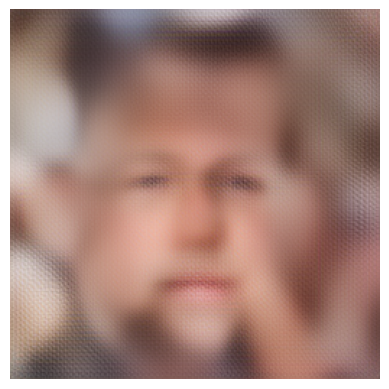

In [33]:
import torch

tensor_0 = torch.load('/pfs/work9/workspace/scratch/ma_mgraevin-optdif/results/debug_07/data/samples/iter_10/img_tensor/tensor_0.pt', weights_only=False)

show_tensor(tensor_0)

In [34]:
# npz file to table
import pandas as pd
import numpy as np
results = np.load("/pfs/work9/workspace/scratch/ma_mgraevin-optdif/results/debug_07/results.npz", allow_pickle=True)

print(f"Parameters: {results['params']}")

# Convert the npz file to a pandas DataFrame
df = pd.DataFrame({
    #'opt_points': list(results['opt_points']),
    'opt_point_properties': list(results['opt_point_properties']),
    #'opt_latent_points': list(results['opt_latent_points']),
    #'opt_sd_latent_points': list(results['opt_sd_latent_points']),
    'opt_model_version': list(results['opt_model_version']),
})

df

Parameters: ['src/lso.py', '--device', 'cuda', '--seed', '42', '--img_dir', 'data/ffhq/images1024x1024', '--img_tensor_dir', 'data/ffhq/pt_images', '--attr_path', 'data/ffhq/ffhq_smile_scores_scaled.json', '--max_property_value', '1', '--min_property_value', '0', '--batch_size', '128', '--num_workers', '4', '--val_split', '0', '--weight_type', 'uniform', '--query_budget', '100', '--retraining_frequency', '5', '--n_retrain_epochs', '0.1', '--n_init_retrain_epochs', '1', '--result_path', 'results/debug_07/', '--sd_vae_path', 'stabilityai/stable-diffusion-3.5-medium', '--latent_model_config_path', 'models/latent_vqvae/configs/sd35m_to_512d_attn.yaml', '--latent_model_ckpt_path', 'models/latent_vqvae/version_5/checkpoints/last.ckpt', '--predictor_path', 'models/classifier/celeba_smile/predictor_128_scaled3.pth.tar', '--scaled_predictor', 'True', '--predictor_attr_file', 'models/classifier/celeba_smile/attributes.json', '--bo_surrogate', 'GP', '--n_out', '5', '--n_starts', '20', '--n_sample

,opt_point_properties,opt_model_version
0,1.875654,0
1,2.508367,0
2,1.426412,0
3,1.382849,0
4,0.769544,0
5,0.692708,1
6,1.622522,1
7,0.908143,1
8,1.703863,1
9,1.392013,1


In [35]:
df_grouped = df.groupby('opt_model_version')['opt_point_properties'].apply(list).apply(lambda x: x[:5]).apply(pd.Series)
df_grouped.columns = [f'tensor_{i}' for i in range(5)]
df_grouped

,tensor_0,tensor_1,tensor_2,tensor_3,tensor_4
opt_model_version,,,,,
0,1.875654,2.508367,1.426412,1.382849,0.769544
1,0.692708,1.622522,0.908143,1.703863,1.392013
2,1.471553,1.004732,1.429897,1.292665,1.057500
3,1.150017,0.935344,1.417778,1.523593,1.133361
4,0.540006,0.961561,0.693740,1.295044,0.981012


In [37]:
df_grouped_mean = df_grouped.mean(axis=1)
df_grouped_mean = df_grouped_mean.reset_index()
df_grouped_mean.columns = ['opt_model_version', 'mean']
df_grouped_mean

,opt_model_version,mean
0,0,1.592565
1,1,1.263850
2,2,1.251270
3,3,1.232019
4,4,0.894272


In [38]:
# group and extract mean, min, and max over the first 5 tensors
df_grouped_stats = df_grouped.agg(['mean', 'min', 'max'], axis=1).reset_index()
df_grouped_stats

,opt_model_version,mean,min,max
0,0,1.592565,0.769544,2.508367
1,1,1.263850,0.692708,1.703863
2,2,1.251270,1.004732,1.471553
3,3,1.232019,0.935344,1.523593
4,4,0.894272,0.540006,1.295044


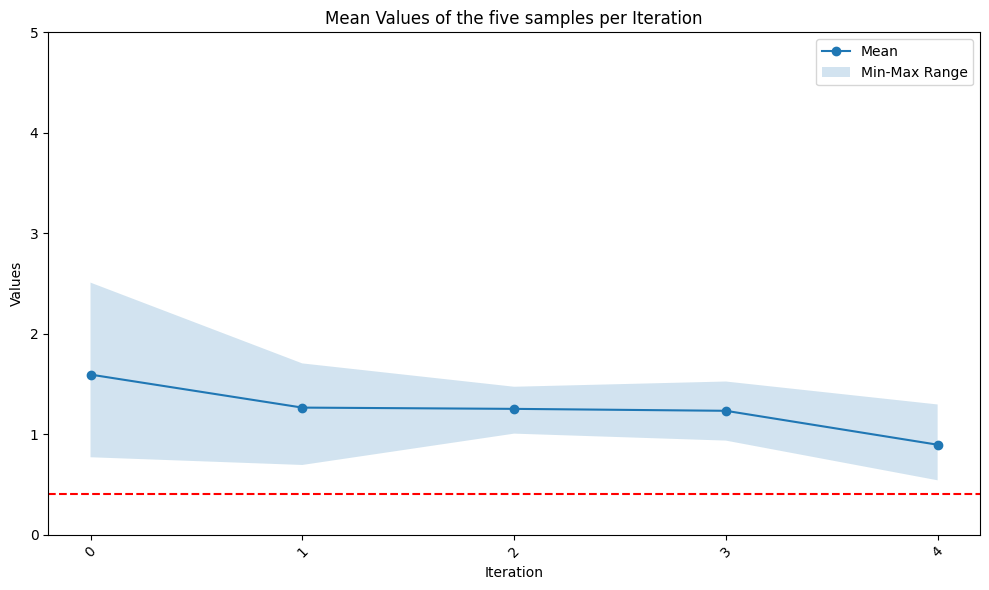

In [39]:
# visualize the mean values
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_grouped_mean['opt_model_version'], df_grouped_stats['mean'], marker='o', label='Mean')
ax.fill_between(df_grouped_mean['opt_model_version'], df_grouped_stats['min'], df_grouped_stats['max'], alpha=0.2, label='Min-Max Range')
ax.legend()
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title('Mean Values of the five samples per Iteration')
ax.set_ylim(0, 5)
ax.axhline(y=0.4, color='red', linestyle='--')
plt.xticks(ticks=range(len(df_grouped_mean['opt_model_version'])), labels=df_grouped_mean['opt_model_version'], rotation=45)
plt.tight_layout()
plt.show()